# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

# Read and clean data

## Wage

**Read the Lonniveau data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [2]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [3]:
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [4]:
#LÆngere nede

## Gini

In [5]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [6]:
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


In [7]:
diff_m = [m for m in wage.municipality.unique() if m not in gini.municipality.unique()] 
print(f'municipalities in wage data, but not in gini data: {diff_m}')

municipalities in wage data, but not in gini data: ['Christiansø', nan]


We Therefore remove 'Christiansø' from our wage dataset using the 'function'

In [8]:
wage = dataproject.only_keep_municipalities(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


In [9]:
gini = dataproject.only_keep_municipalities(gini)
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [10]:
# a. rename year columns
mydict1 = {str(k):f'gini{k}' for k in range(2009,201)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,2016,2017,2014,2012,2013,2010,2015,2011,2018,2009,gini


In [11]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2017)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head()

,municipality,year,2017,2018,wage
0,Hele landet,2009,41144,41931,35734
1,København,2009,42894,43953,36607
2,Frederiksberg,2009,48321,49563,41119
3,Dragør,2009,51451,52807,43215
4,Tårnby,2009,41559,42664,36147


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [12]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [13]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
               
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

interactive(children=(Dropdown(description='Dataset', options=('wage', 'gini'), value='wage'), Dropdown(descri…

interactive(children=(Dropdown(description='Dataset', options=('wage', 'gini'), value='wage'), Dropdown(descri…

# NEW GRAPH

In [14]:
#We select the municipalities we wish to illustrate

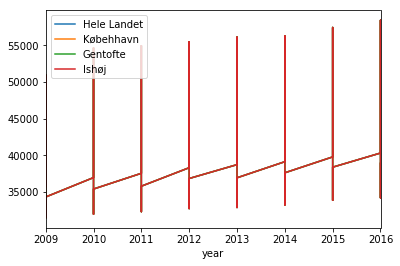

In [15]:
municipalities2 = ['Hele Landet','Købehhavn','Gentofte','Ishøj']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities2:
    wage_long.plot(x='year',y='wage',ax=ax,label=m)

ax.legend(frameon=True)

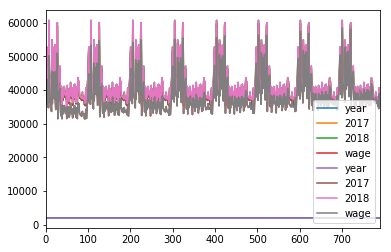

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

wage_long.plot(ax=ax)
wage_long.plot(ax=ax)

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark.

In [17]:
print(len(gini_long.year.unique()))
print(len(wage_long.year.unique()))
print(len(gini_long.municipality.unique()))
print(len(wage_long.municipality.unique()))

#We merge the two datasets:
merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

0
8
0
99
Number of municipalities = 0
Number of years          = 0


# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [18]:
print(merged.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long)
print(wage_long)
print(merged.groupby('year').agg(['mean']))

Empty DataFrame
Columns: [(2016, mean), (2016, std), (2016, max), (2016, min), (2017_x, mean), (2017_x, std), (2017_x, max), (2017_x, min), (2014, mean), (2014, std), (2014, max), (2014, min), (2012, mean), (2012, std), (2012, max), (2012, min), (2013, mean), (2013, std), (2013, max), (2013, min), (2010, mean), (2010, std), (2010, max), (2010, min), (2015, mean), (2015, std), (2015, max), (2015, min), (2011, mean), (2011, std), (2011, max), (2011, min), (2018_x, mean), (2018_x, std), (2018_x, max), (2018_x, min), (2009, mean), (2009, std), (2009, max), (2009, min), (gini, mean), (gini, std), (gini, max), (gini, min)]
Index: []

[0 rows x 44 columns]
Empty DataFrame
Columns: [(municipality, mean), (municipality, std), (municipality, max), (municipality, min), (2016, mean), (2016, std), (2016, max), (2016, min), (2017, mean), (2017, std), (2017, max), (2017, min), (2014, mean), (2014, std), (2014, max), (2014, min), (2012, mean), (2012, std), (2012, max), (2012, min), (2013, mean), (2013

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.